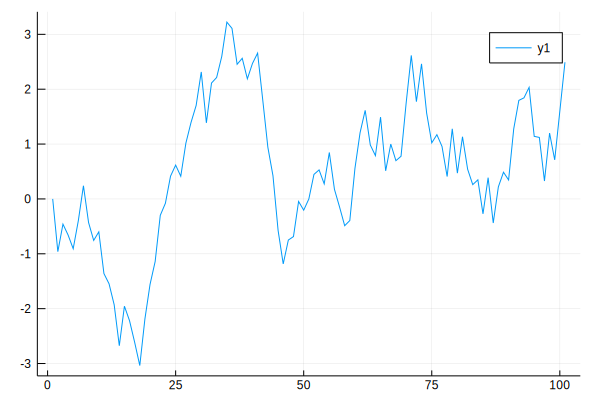

In [1]:
using Plots
using IJulia

walk = [0.0]
for ii in 1:100
    step = 2rand()-1.0
    push!(walk, walk[end]+step)
    plot(1:length(walk), walk) |> IJulia.display
    IJulia.clear_output(true)
    #sleep(0.2)
end

In [3]:
function clifford(x::Float64, y::Float64, a::Float64, b::Float64, c::Float64, d::Float64)
    sin(a * y) + c * cos(a * x), sin(b * x) + d * cos(b * y)
end
function trajectory(fn, x0::Float64, y0::Float64, a::Float64, b::Float64, c::Float64, d::Float64, 
        dθ::Float64,  n::Int64)
    x, y, θ = zeros(n), zeros(n), 0.01
    x[1], y[1] = x0, y0
    for i = 1:n
        xd, yd = fn(x[i], y[i], a, b, c, d)
        @inbounds x[i+1], y[i+1] = xd*cos(θ), yd*cos(θ)
        θ += dθ
    end
    x, y
end
n = 5000000
x, y = trajectory(clifford, 0.0, 0.0, -1.3, -1.3, -1.8, -1.9, 0.007, n);
using GR
# shade(x, y, xform=GR.XFORM_EQUALIZED, colormap=-GR.COLORMAP_HOT, xlim=(-4,4), ylim=(-3,3))
shade(x, y, colormap=-GR.COLORMAP_HOT, xlim=(-4,4), ylim=(-3,3))

SystemError: SystemError: opening file /tmp/juliaQXVNJR.svg: No such file or directory

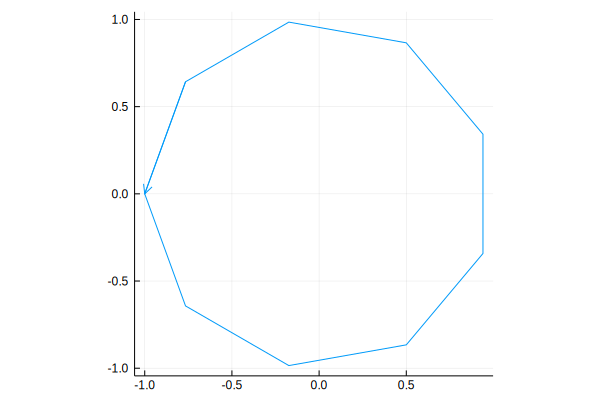

In [4]:
using Plots
# a,b = -π, π
a,b = -π, π
tt = range(a, stop=b, length=10)

γ = t -> exp(+im*t) + .0*exp(-im*t)

plot(real.(γ.(tt)), imag.(γ.(tt)); ratio=1.0, legend=false, arrow=true)
#plot(tt, real.(γ.(tt)); ratio=1.0, legend=false, arrow=true)
#plot(tt, imag.(γ.(tt)); ratio=1.0, legend=false, arrow=true)


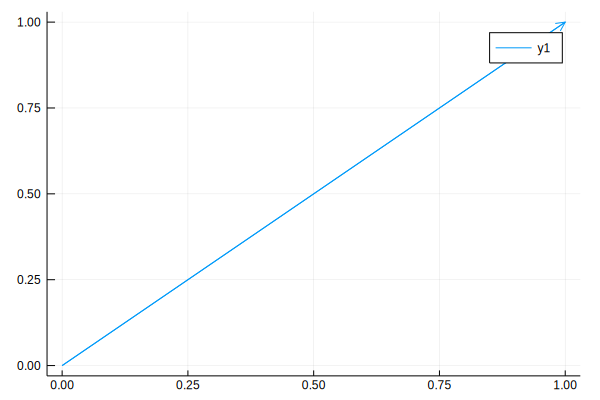

In [5]:
plot([0;1], [0;1]; arrow=true)

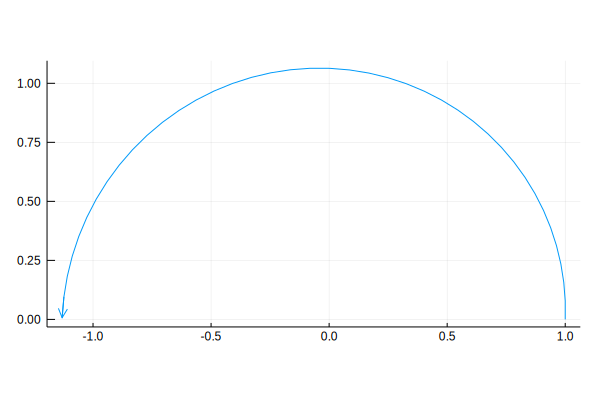

In [ ]:
using Plots
using IJulia

f = (i,n) -> (1+im*π/n)^i

data = [0.0]
for n in 0:100
    # push!(data, data[end]+step)
    x = range(0, stop=n, length=n+1);
    xx = real.(f.(x,n))
    yy = imag.(f.(x,n))
    plot(xx, yy; ratio=1.0, legend=false, arrow=true) |> IJulia.display
    # plot(1:length(data), data) |> IJulia.display
    IJulia.clear_output(true)
    sleep(.2)
end

In [13]:
using GR
using Printf
using LinearAlgebra

# Simple particle simulation

const N = 500                   # number of particles
M = 0.05 * ones(Float64, N)     # masses
const S = 0.04                  # size of particles
const dt = 1.0 / 30

function step(dt, p, v)
  # update positions
  p[:,:] += dt * v[:,:]

  # find pairs of particles undergoing a collision
  for i in 1:N
    for j in i+1:N
      dx = p[i,1] - p[j,1]
      dy = p[i,2] - p[j,2]
      d = sqrt(dx*dx + dy*dy)

      if d < 2*S
        # relative location & velocity vectors
        r_rel = p[i] - p[j]
        v_rel = v[i] - v[j]

        # momentum vector of the center of mass
        v_cm = (M[i] * v[i] + M[j] * v[j]) / (M[i] + M[j])

        # collisions of spheres reflect v_rel over r_rel
        rr_rel = dot(r_rel, r_rel)
        vr_rel = dot(v_rel, r_rel)
        v_rel = 2 * r_rel * vr_rel / rr_rel - v_rel

        # assign new velocities
        v[i] = v_cm + v_rel * M[j] / (M[i] + M[j])
        v[j] = v_cm - v_rel * M[i] / (M[i] + M[j])
      end
    end
  end

  # check for crossing boundary
  for i in 1:N
    if p[i,1] < -2 + S
      p[i,1] = -2 + S
      v[i,1] *= -1
    elseif p[i,1] > 2 - S
      p[i,1] = 2 - S
      v[i,1] *= -1
    end
    if p[i,2] < -2 + S
      p[i,2] = -2 + S
      v[i,2] *= -1
    elseif p[i,2] > 2 - S
      p[i,2] = 2 - S
      v[i,2] *= -1
    end
  end

  return p, v
end

function main()

  setwindow(-2, 2, -2, 2)
  setviewport(0, 1, 0, 1)
  setmarkertype(GR.MARKERTYPE_SOLID_CIRCLE)
  setmarkersize(1.0)

  n = 0
  t = 0.0

  p = (rand(N,2) .- 0.5) .* (4 .- 2 .* S)    # initial positions
  v = rand(N,2) .- 0.5                       # initial velocities

  s = time_ns()

  while n < 300

    p, v = step(dt, p, v)

    clearws()
    setmarkercolorind(983)
    polymarker(p[:,1], p[:,2])

    if n > 0
      text(0.01, 0.95, @sprintf("%10s: %4d fps", "Julia", round(n / (1e-9 * (time_ns() - s)))))
    end
    updatews()

    n += 1
    t += dt

  end
end

main()

UndefVarError: UndefVarError: text not defined

In [9]:
import Pkg;Pkg.add("GR")

 Resolving package versions...
  Updating `~/.julia/Project.toml`
  [28b8d3ca] + GR v0.37.0
  Updating `~/.julia/Manifest.toml`
  [28b8d3ca] + GR v0.37.0
  [682c06a0] + JSON v0.20.0
  [b99e7846] + BinaryProvider 
  [34da2185] + Compat 
  [864e158e] + CredentialsHandler 
  [ade2ca70] + Dates 
  [8bb1440f] + DelimitedFiles 
  [cd3eb016] + HTTP 
  [83e8ac13] + IniFile 
  [76f85450] + LibGit2 
  [739be429] + MbedTLS 
  [a63ad114] + Mmap 
  [44cfe95a] + Pkg 
  [de0858da] + Printf 
  [3fa0cd96] + REPL 
  [ea8e919c] + SHA 
  [1a1011a3] + SharedArrays 
  [4607b0f0] + SuiteSparse 
  [9d418dce] + TOML 
  [cf7118a7] + UUIDs 
  [4ec0a83e] + Unicode 


In [6]:
import Pkg; Pkg.update()

 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]


In [ ]:
import Pkg